## Customer Segments

In [115]:
# Import libraries necessary
import numpy as np
import pandas as pd
from IPython.display import display

import visuals as vs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

SEED = 1987 # specify seed for reproducable results
pd.set_option('display.max_columns', None)

from scipy import stats
from scipy.special import boxcox1p ## This 1 addition before bozcox to tackle zero values
from sklearn.decomposition import PCA

In [7]:
data = pd.read_csv('customers.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [42]:
indices = [25,50,75]
##data.keys()
##data.columns
samples = pd.DataFrame(data = data.iloc[indices], columns = data.columns).reset_index(drop= True)

samples

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,16165,4230,7595,201,4003,57
1,1,3,6269,1095,1980,3860,609,2162
2,1,3,20398,1137,3,4407,3,975


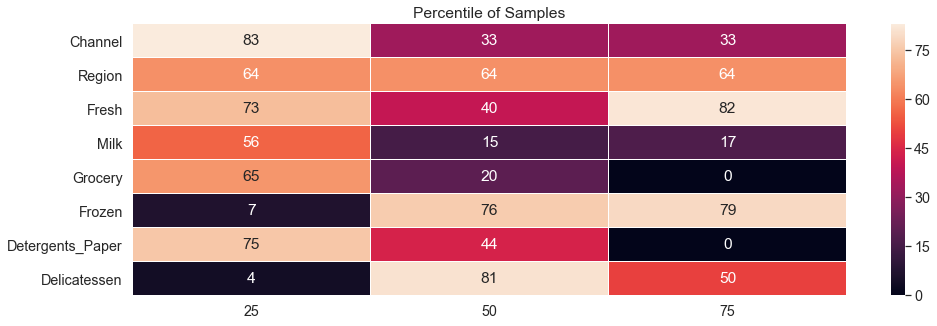

In [24]:
plt.figure(1, figsize =(16,5))
plt.title('Percentile of Samples')
pct = (data.rank(pct = True).iloc[indices]*100).astype(int)
sns.heatmap(pct.transpose(),annot= True,linewidths=0.5)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

for col in data.columns:
    new_data = data.drop([col], axis =1)
    X_train,X_test, y_train, y_test = train_test_split(new_data, data[col],random_state = 1987,test_size = 0.25)
    regressor = DecisionTreeRegressor(random_state = 1987).fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    print('R2 Score for feature {} is {}'.format(col, score))
    

R2 Score for feature Channel is 0.4632132132132131
R2 Score for feature Region is -1.0186335403726705
R2 Score for feature Fresh is -0.5249866868224442
R2 Score for feature Milk is 0.026222317950533536
R2 Score for feature Grocery is 0.7261314798721787
R2 Score for feature Frozen is -0.45377214517211306
R2 Score for feature Detergents_Paper is 0.6800261616445374
R2 Score for feature Delicatessen is -5.2629538894353365


##### Visualize Feature Distributions

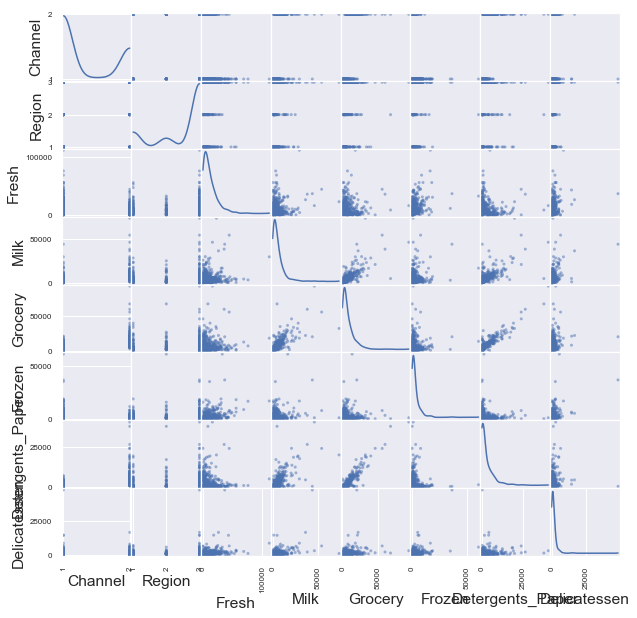

In [36]:
# Produce a scatter matrix for each pair of features in the data

pd.plotting.scatter_matrix(data, figsize = (10,10),diagonal = 'kde');

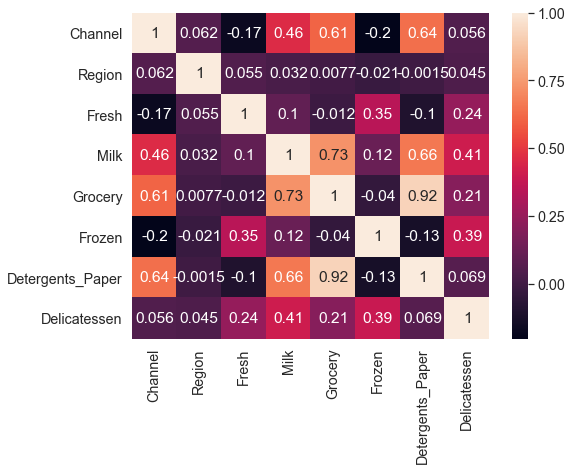

In [39]:
plt.figure(1, figsize =(8,6))
sns.heatmap(data.corr(), annot=True);

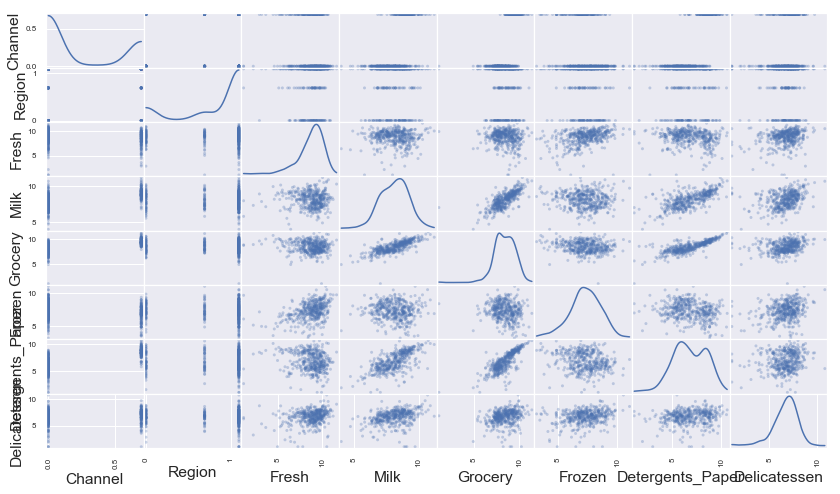

In [43]:
## Data Preprocessing

# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

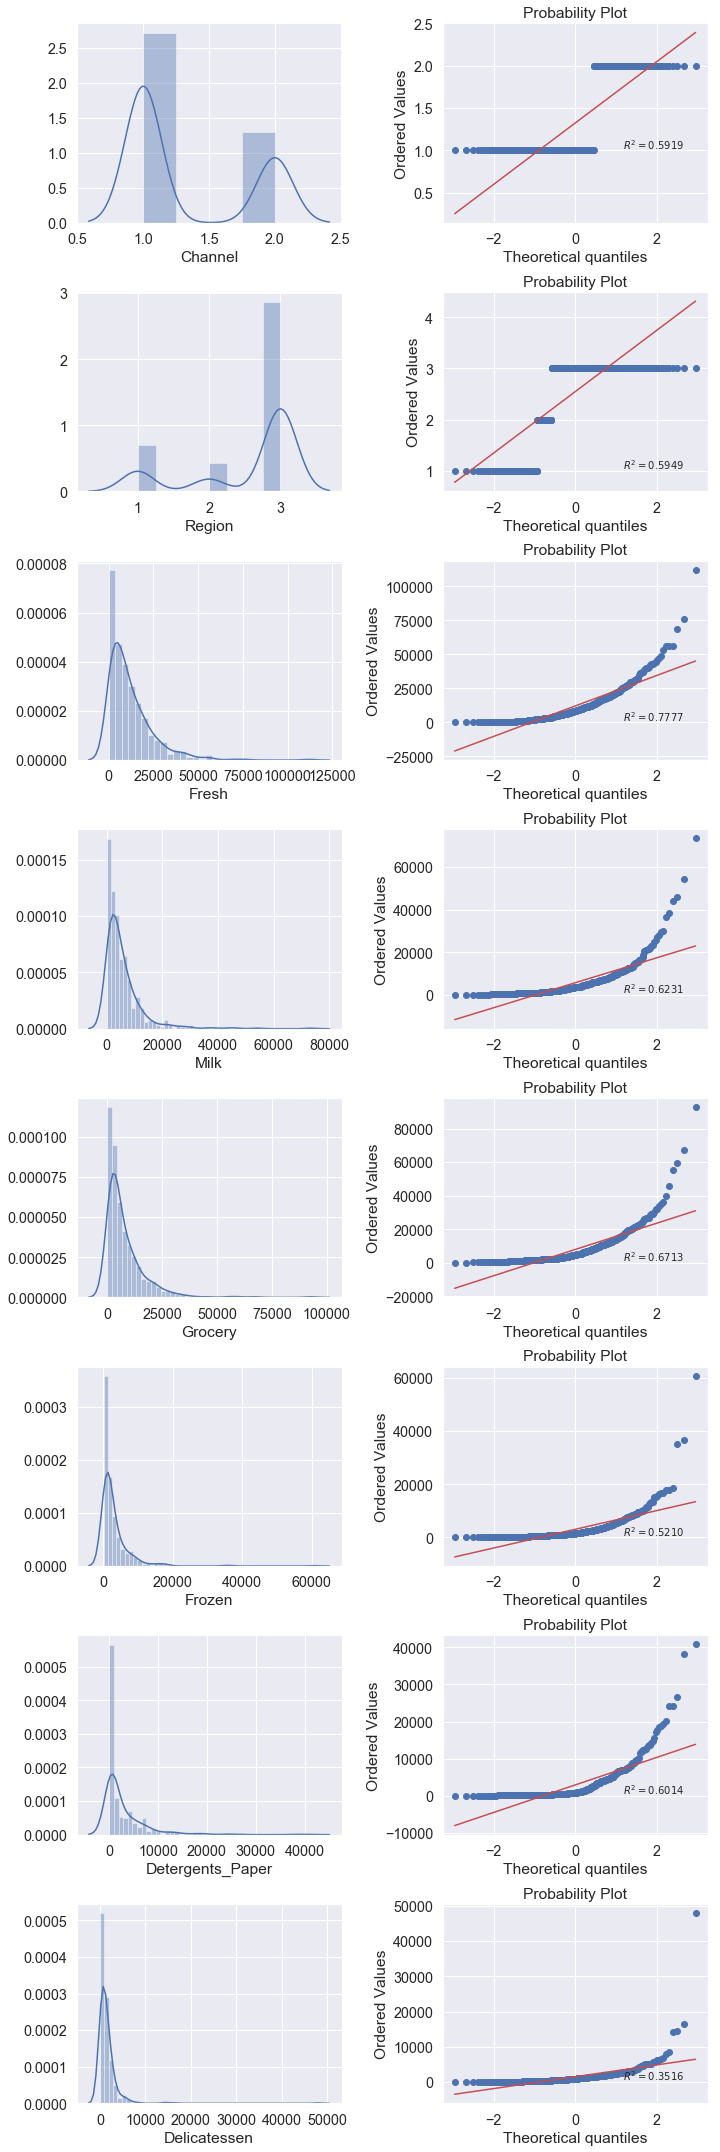

In [65]:
## No transform
fig = plt.figure(1, figsize = (10,30))
i=0
for col in data.columns:
    i +=1
    ax1 = fig.add_subplot(len(data.columns),2,i )
    sns.distplot(data[col])
    i+=1
    ax2 = fig.add_subplot(len(data.columns),2,i )
    ##plt.subplot(len(data.columns),2,i )
    prob = stats.probplot(data[col], dist=stats.norm, plot=ax2, rvalue = True)
    plt.tight_layout()

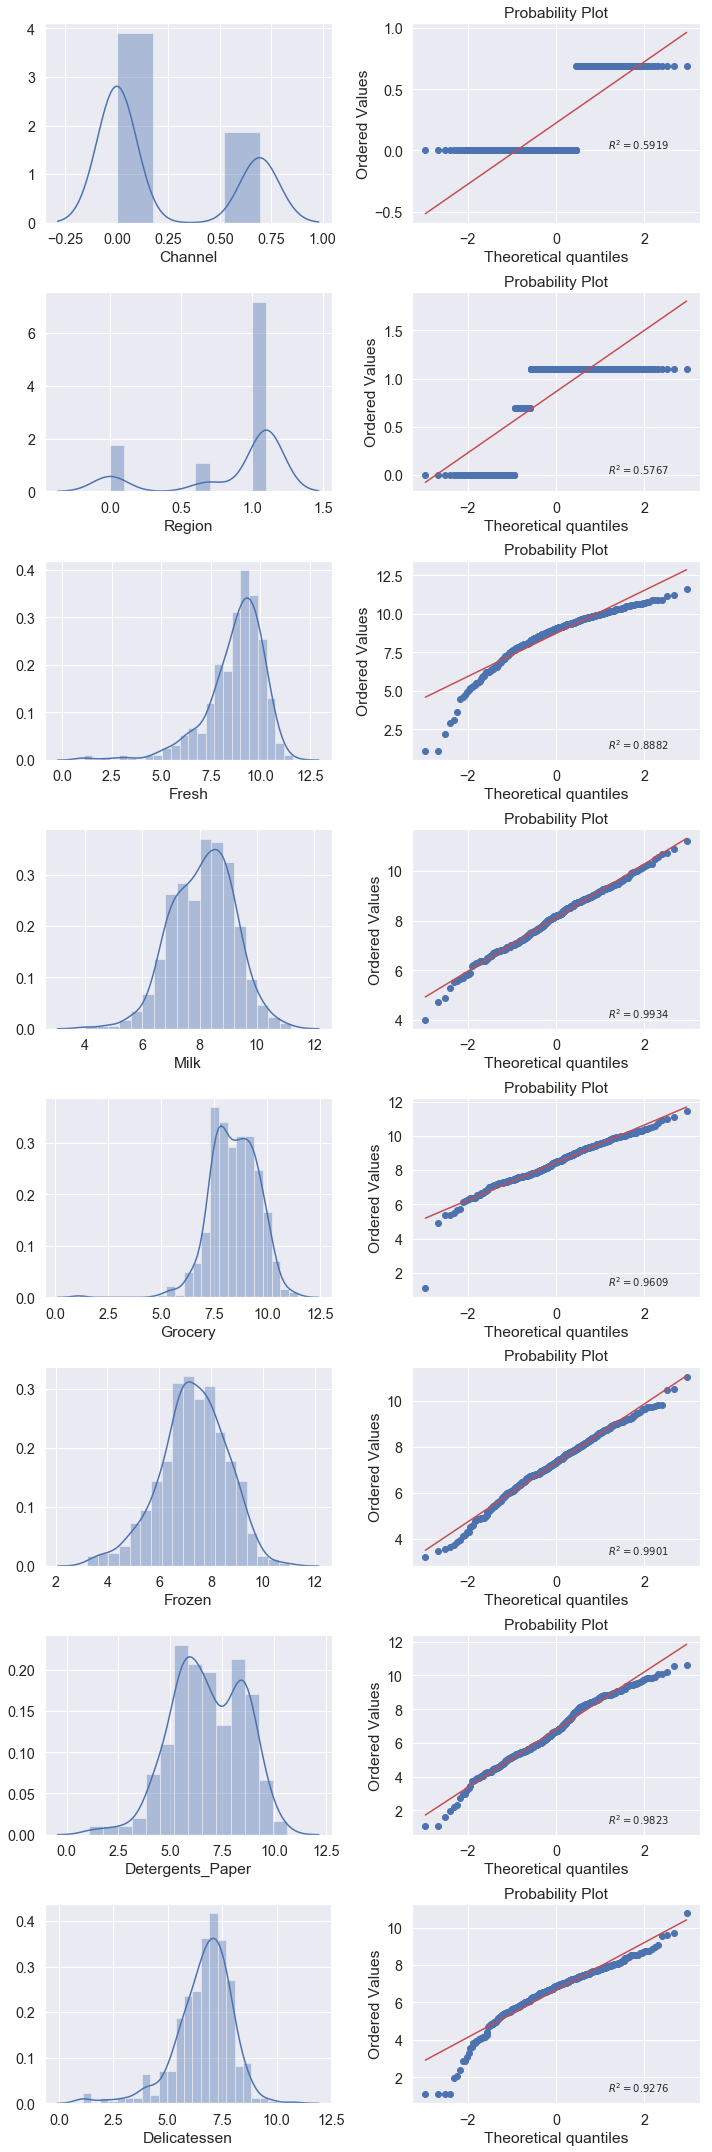

In [64]:
## Log Transform
fig = plt.figure(1, figsize = (10,30))
i=0
log_data = np.log(data) ## log transform
for col in data.columns:
    i +=1
    ax1 = fig.add_subplot(len(data.columns),2,i )
    sns.distplot(log_data[col])
    i+=1
    ax2 = fig.add_subplot(len(data.columns),2,i )
    ##plt.subplot(len(data.columns),2,i )
    prob = stats.probplot(log_data[col], dist=stats.norm, plot=ax2, rvalue = True)
    plt.tight_layout()

### BoxCox on Train Test data

In [ ]:

# split into testing & training data
#train,test = train_test_split(original_data, shuffle=False)

# transform training data & save lambda value
#train_data,fitted_lambda = stats.boxcox(train)

# use lambda value to transform test data
#test_data = stats.boxcox(test, fitted_lambda)

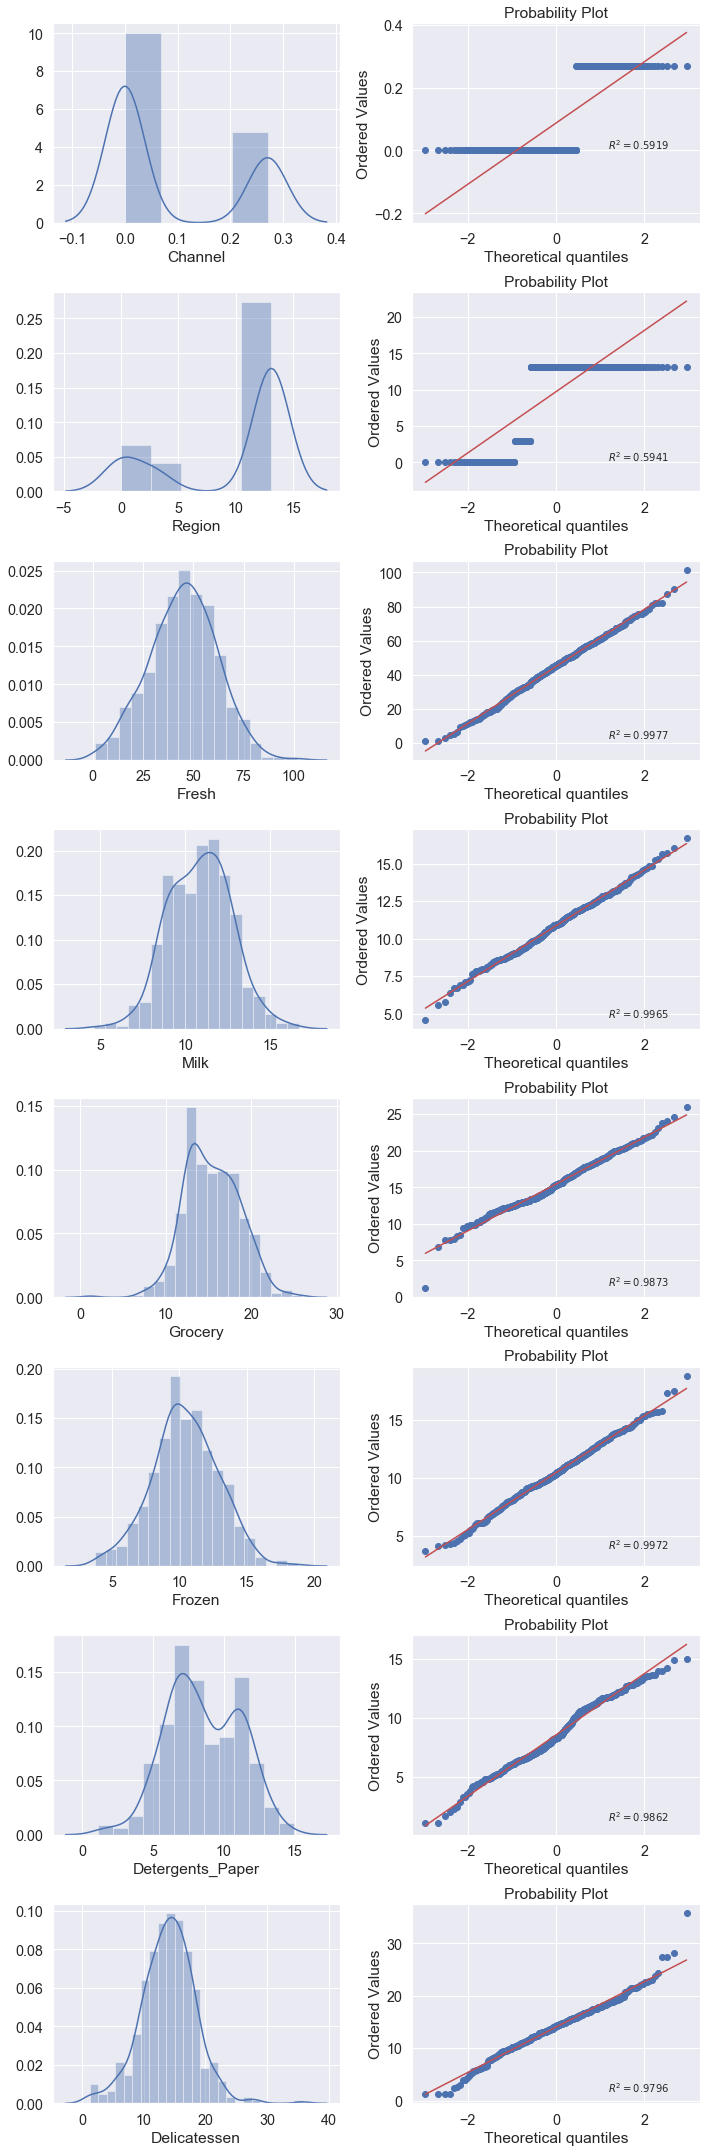

In [84]:
## BoxCox Transform

fig = plt.figure(1, figsize = (10,30))
i=0

boxcox_data = pd.DataFrame()
for col in data.columns:
    xt, fitted_lambda = stats.boxcox(data[col])
    i +=1
    ax1 = fig.add_subplot(len(data.columns),2,i) 
    ax1.set_xlabel(col)
    boxcox_data[col] = xt

    sns.distplot(xt)
    i+=1
    ax2 = fig.add_subplot(len(data.columns),2,i )
    ##plt.subplot(len(data.columns),2,i )
    
    prob = stats.probplot(xt, dist=stats.norm, plot=ax2, rvalue = True)
    plt.tight_layout()


In [85]:
## Outlier Detection

boxcox_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.270315,13.083485,51.736919,12.670296,16.694343,6.887991,10.154313,15.470232
1,0.270315,13.083485,42.989031,12.699553,17.444170,10.638490,10.494584,16.620941
2,0.270315,13.083485,41.571828,12.500943,16.745021,11.254315,10.602565,23.790243
3,0.000000,13.083485,52.490385,9.068054,14.932092,13.308825,7.587652,16.649068
4,0.270315,13.083485,62.025081,11.620137,16.540472,12.253988,9.499037,21.583731


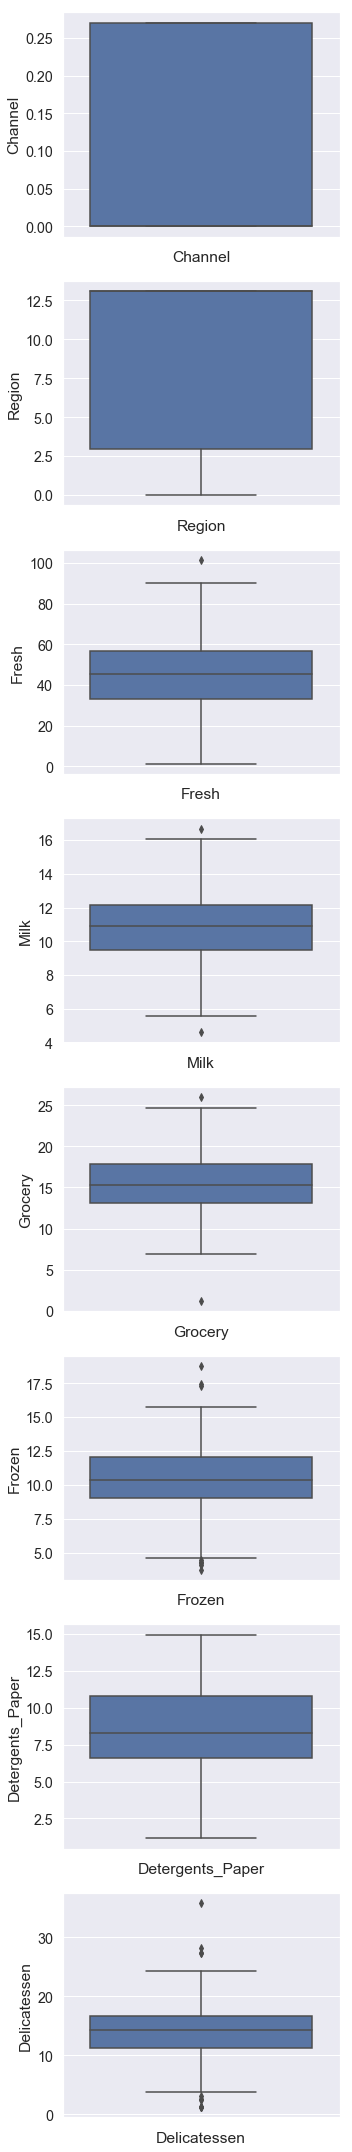

In [92]:
## Outlier Detection
fig = plt.figure(1, figsize = (5,30))
i= 0
for col in boxcox_data.columns:
    i +=1
    ax1 = fig.add_subplot(len(data.columns),1,i) 
    ax1.set_xlabel(col)
    sns.boxplot(y=boxcox_data[col])
    plt.tight_layout()

##### There is quite a few outliers in our data.Lets remove them

In [108]:
# For each feature find the data points with extreme high or low values

outliers= []
for col in boxcox_data.columns:
    ##Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(boxcox_data[col], 25)
    ##Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(boxcox_data[col], 75)
    
    step = 1.5*(Q3 - Q1)
    print("Data points considered outliers for the feature '{}':".format(col))
    out = boxcox_data[~((boxcox_data[col]> Q1 -step) & (boxcox_data[col]< Q3 + step))]

    if out.shape[0] == 0:
        print('***No Outliers found***')
    else:
        display(out)
        outliers= outliers + list(out.index.values)

Data points considered outliers for the feature 'Channel':
***No Outliers found***
Data points considered outliers for the feature 'Region':
***No Outliers found***
Data points considered outliers for the feature 'Fresh':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,0.0,13.083485,101.573143,14.821915,19.601092,15.50805,11.172697,24.271947


Data points considered outliers for the feature 'Milk':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,0.270315,13.083485,62.288609,16.688053,21.679026,9.536029,13.638422,13.972230
154,0.000000,13.083485,19.248391,4.596233,6.853242,5.270266,2.066981,2.552898


Data points considered outliers for the feature 'Grocery':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,0.000000,13.083485,60.062043,8.986896,1.179625,12.503507,1.136529,14.255725
85,0.270315,13.083485,55.798197,15.720152,25.969331,9.607979,14.972315,18.835821


Data points considered outliers for the feature 'Frozen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,0.270315,13.083485,37.459452,13.586912,19.312696,4.105383,11.753132,11.456670
57,0.270315,13.083485,39.504696,12.722615,17.742449,4.299517,11.899624,15.301847
65,0.270315,13.083485,9.188742,14.140339,23.052620,4.224827,13.986676,15.715235
93,0.000000,13.083485,49.925899,10.642868,12.938974,17.328537,4.872810,18.437994
145,0.270315,13.083485,61.528592,12.410476,21.982978,4.438733,12.793740,20.789660
183,0.000000,13.083485,72.168663,15.617995,19.974332,17.437506,6.510175,35.778584
325,0.000000,2.947753,69.562134,13.711142,18.613584,18.774934,8.975021,21.989377
420,0.000000,13.083485,37.101010,11.572219,18.513233,3.730425,11.718648,15.630149


Data points considered outliers for the feature 'Detergents_Paper':
***No Outliers found***
Data points considered outliers for the feature 'Delicatessen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,0.270315,13.083485,65.063127,15.236169,20.288091,12.837631,10.951341,28.228416
71,0.000000,13.083485,58.051662,9.159633,20.125297,12.927220,10.886939,27.391986
87,0.000000,13.083485,75.837758,11.489218,16.917970,13.277140,9.312650,27.339709
109,0.270315,13.083485,25.412563,13.704848,21.294647,8.838334,8.332239,1.222366
128,0.000000,13.083485,11.185311,12.509059,14.645549,6.237033,8.696657,1.222366
142,0.000000,13.083485,72.282907,12.121060,16.970632,11.699033,3.289073,1.222366
154,0.000000,13.083485,19.248391,4.596233,6.853242,5.270266,2.066981,2.552898
183,0.000000,13.083485,72.168663,15.617995,19.974332,17.437506,6.510175,35.778584
184,0.000000,13.083485,15.333829,8.646688,15.253508,5.250524,6.983535,3.041318
187,0.000000,13.083485,30.495863,12.325237,17.528035,13.262187,10.575590,1.222366


In [110]:
### Remove the outliers

good_data = boxcox_data.drop(boxcox_data.index[outliers]).reset_index(drop = True)

In [112]:
print(good_data.shape)
good_data.head()

(418, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.270315,13.083485,51.736919,12.670296,16.694343,6.887991,10.154313,15.470232
1,0.270315,13.083485,42.989031,12.699553,17.444170,10.638490,10.494584,16.620941
2,0.270315,13.083485,41.571828,12.500943,16.745021,11.254315,10.602565,23.790243
3,0.000000,13.083485,52.490385,9.068054,14.932092,13.308825,7.587652,16.649068
4,0.270315,13.083485,62.025081,11.620137,16.540472,12.253988,9.499037,21.583731


### Feature Transformation

In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.


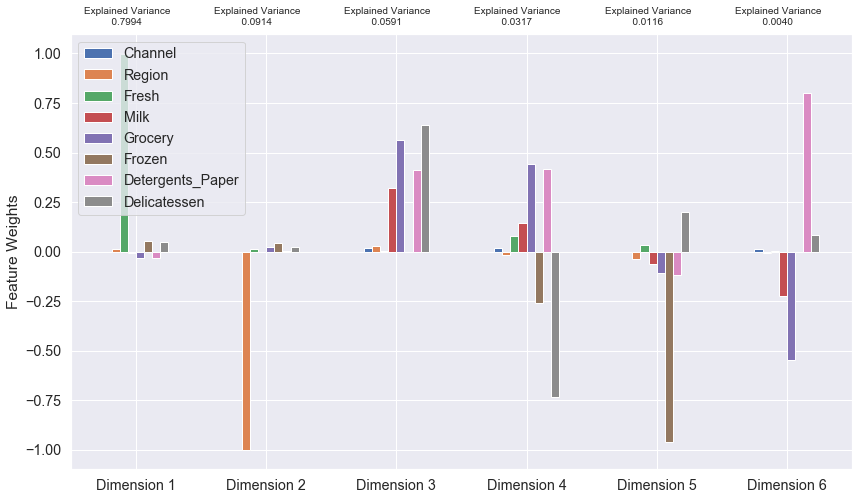

In [117]:
##PCA
pca = PCA(n_components = 6).fit(good_data)

#Transform log_samples using the PCA fit above
#pca_samples = pca.transform(box_cox_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [118]:
display(pca_results)
print(pca_results['Explained Variance'].cumsum())

,Explained Variance,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.7994,-0.0016,0.0138,0.9963,-0.0090,-0.0297,0.0532,-0.0335,0.0475
Dimension 2,0.0914,-0.0008,-0.9986,0.0112,-0.0042,0.0217,0.0418,0.0022,0.0229
Dimension 3,0.0591,0.0176,0.0264,0.0029,0.3223,0.5652,-0.0021,0.4102,0.6383
Dimension 4,0.0317,0.0164,-0.0169,0.0775,0.1422,0.4422,-0.2591,0.4173,-0.7325
Dimension 5,0.0116,-0.0005,-0.0376,0.0346,-0.0632,-0.1073,-0.9631,-0.1179,0.2009
Dimension 6,0.0040,0.0128,-0.0074,0.0049,-0.2248,-0.5482,-0.0042,0.8010,0.0842


Dimension 1    0.7994
Dimension 2    0.8908
Dimension 3    0.9499
Dimension 4    0.9816
Dimension 5    0.9932
Dimension 6    0.9972
Name: Explained Variance, dtype: float64


A positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features. The rate of increase or decrease is based on the individual feature weights.

- 89.08% (0.8908) of the variance in the data is explained by the first and second principal components.
- 94.99% (0.9499) of the variance in the data is explained by the first four principal components.

- 1. **The first principal component (PC1):**
     - An increase in PC1 is associated with large increases in "Fresh"spending. These features best represent PC1.
     - This is in line with our initial findings where the 3 features are highly correlated.
  2. **The second principal component (PC2):**
     - An increase in PC2 is associated with large increases in "Region" spending. These features best represent PC2.
     - This makes sense as PC1 represents different features. And in PC2, the features in PC1 have very small positive weights.
  3. **The third principal component (PC3):**
     - An increase in PC3 is associated with a large increase in "Milk" and a large decrease in "Grocery",'Detergent_Papers spending. These features best represent PC3.
  4. **The fourth principal component (PC4):**
     - An increase in PC4 is associated with a large increasing in "Grocery" and a large decrease in "Detergent Papers" spending.
These features best represent PC4.

In [ ]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

In [127]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

,Explained Variance,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.7994,-0.0016,0.0138,0.9963,-0.0090,-0.0297,0.0532,-0.0335,0.0475
Dimension 2,0.0914,-0.0008,-0.9986,0.0112,-0.0042,0.0217,0.0418,0.0022,0.0229


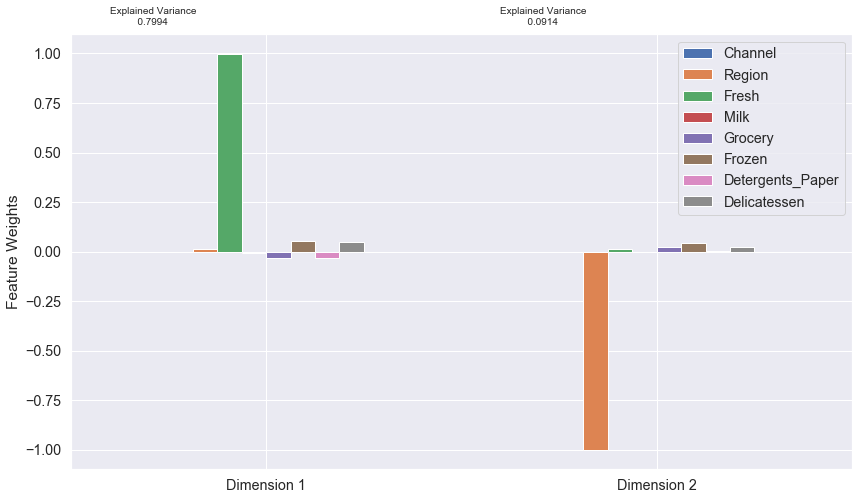

In [122]:
vs.pca_results(good_data, pca)

In [128]:
reduced_data.head()

,Dimension 1,Dimension 2
0,6.836859,-3.500480
1,-1.658595,-3.398463
2,-2.678215,-3.238458
3,8.156191,-3.224930
4,17.698904,-3.021179


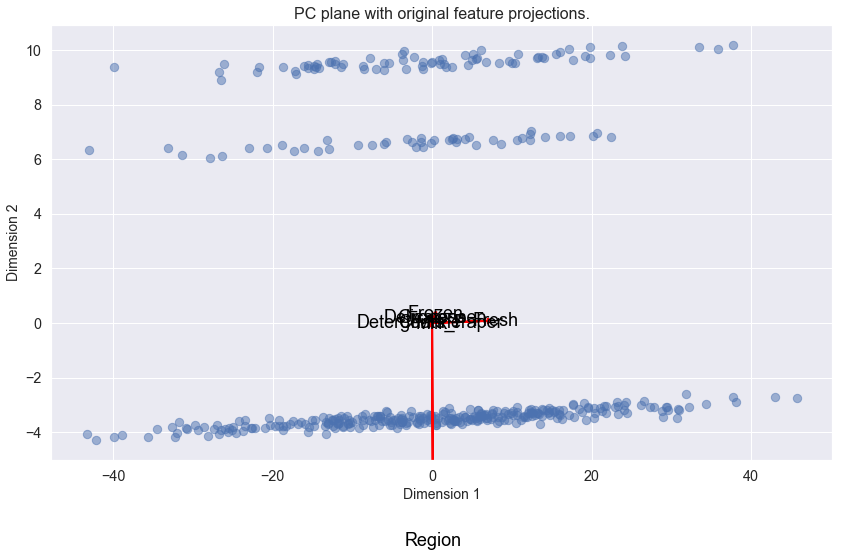

In [129]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

## Clustering

In this section, we will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale.

- **K-means Clustering:**

  - Advantages

    1. With a large number of features, K-means can be computationally faster if K is small.
    2. K-Means could result in tighter clusters than hierarchical clustering.

  - Disadvantages

    1. Difficulty in comparing quality of the clusters produced.
    2. K-means is highly sensitive to outliers.
    2. Since preset K value is required, it could be difficult to predict which K is best. We may use the elbow method here
    3. K-means assigns data poins to the closest cluster in terms of Euclidian distance. Thus, it treats distances in all directions equally. Hence k-Means produces only spherical clusters. Assumes data is globular with doesn't always occur in real-life data.
    4. K-means is a ligher version of GMM, it can be seen as a special (limit) case of GMMs, specifically as GMM with diagonal, equal and small covariance matrices.

- **Gaussian Mixture Model (GMM):**

  - Advantages

    1. Capable of "soft" classification. That is, each data point is assigned a probability for each cluster, indicating how likely it belongs to the cluster. K-means only provides hard assignments, i.e., it chooses a single cluster for each data point.
    2. If you think that your model is having some hidden, not observable parameters, then you should use GMM. This is because, this algorithm is assigning a probability to each point to belong to certain cluster, instead of assigning a flag that the point belongs to certain cluster as in the classical k-Means.
    3. Works with different distributions of the data. It can fit more complex cluster shapes since each mixture component can freely fit its covariance matrix.
  
  - Disadvantages

    1. Could fail if the dimensionality of the problem is too high.
    2. For GMMs, many parameters must be fitted to the data (quadratic in the number of features) while k-means only maintains cluster centers (linear in number of features). Hence, take more time than K Means to train the data.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.


##### GMM Implementation

In [160]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def produceGaussianMixture(k):
    '''
    Predict the Cluster using GMM
    '''
    
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components =k, random_state=1987).fit(reduced_data)
    
    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # Find the cluster centers
    centroids = clusterer.means_
    
    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)

    
    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters' 

for k in range(2,12):
    score = produceGaussianMixture(k)
    results = results.append(pd.DataFrame([score], columns =['Silhouette Score'],index =[k]))
    
display(results)

Number of Clusters,Silhouette Score
2,0.213036
3,0.089367
4,0.070408
5,-0.082311
6,0.102764
7,0.282642
8,0.310954
9,0.403519
10,0.411888
11,0.397919


### K Mean 

In [164]:
from sklearn.cluster import KMeans
X1 = good_data.iloc[:,:].values

inertia = []
for i in range(1,11):
    algo = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init=10)
    algo.fit(X1)
    inertia.append(algo.inertia_)

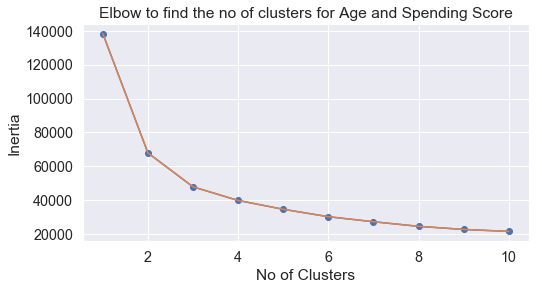

In [166]:
plt.figure(1, figsize = (8,4))

plt.plot(np.arange(1,11),inertia,marker= 'o')
plt.plot(np.arange(1,11),inertia,'-')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow to find the no of clusters for Age and Spending Score');

In [167]:
## I am selecting 4 as the number of custers

In [168]:
algo = KMeans(n_clusters = 4, init= 'k-means++', max_iter = 300, n_init = 10, tol = .0001, random_state = 1987,
         algorithm = 'elkan')

algo.fit(X1)
labels1 = algo.labels_
centroids1 = algo.cluster_centers_

In [179]:
centroid_df =pd.DataFrame()
columns = good_data.columns

#centroids1.shape
for i,col in enumerate(columns):
    #col = 'Dimension '  + str(i+1)
    centroid_df[col] = centroids1[:,i]

In [180]:
centroid_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.075554,9.423090,50.288510,10.413554,14.686961,10.714080,8.039414,13.516110
1,0.098098,9.042761,35.205150,11.044324,15.616579,10.236698,9.052630,14.068805
2,0.055449,10.253178,67.417243,10.820152,15.242000,11.561599,7.982931,15.686733
3,0.137615,10.366194,17.459002,11.176564,16.661713,8.702846,9.513085,12.668033
